In [1]:
import numpy as np
import pandas as pd
from metrics import *
from mountain import *
import math as m
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
import plotly_express as px
from scipy.spatial.distance import cdist
from kmeans import *
from fuzzy_c_means import *
import plotly.graph_objects as go
from utilities import *
import umap
from subclust import *

### Auxiliary functions


In [2]:
np.random.seed(23)

# plot the umap embedding (two dimensional)
def umap_plot(data, labels, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean'):
    reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric)
    embedding = reducer.fit_transform(data)
    plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c=[sns.color_palette()[x] for x in labels])
    # add legend to the plot based on clusters
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('UMAP embedding', fontsize=24)


# normalize data
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Iris dataset

In [ ]:
# load the iris dataset
iris_data = load_iris() 
df_data = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                     columns= iris_data['feature_names'] + ['target'])
# drop target
df_data = df_data.drop(columns=['target'])

## K-means clustering

In [ ]:
# define centroids and clusters using kmeans
centroids,clusters = kmeans_clustering(df_data,3)
# plot the results
plot_kmeans(df_data, 3, centroids.values, clusters)

## Fuzzy c means clustering

In [ ]:
# define centroids and clusters using fuzzy c-means
centroids, membership_matrix = fuzzy_clustering(df_data, 3, 2)
# plot the results
plot_fuzzy_cmeans(df_data.values, 3, centroids, membership_matrix)

## Mountain clustering

In [ ]:
# normalize the data
df_norm = normalize(df_data)
# define parameters for the mountain algorithm
n = 4
gr = 2
kn = 3
sigma = [0.1,0.2,0.2]
# run the mountain algorithm
clusters,centers = mountain_clustering(n,gr,df_norm.values,sigma,kn)

In [ ]:
# plot the results
plot_mountain(df_norm,3,centers,clusters)

In [ ]:
# plot the results using
plot_mountain1(df_norm,3,centers,clusters)

## Subtractive clustering

In [ ]:
# normalize the data
df_norm = normalize(df_data)
# define parameters for subtractive algorithm
r_a = 0.1
r_b = 2*r_a

clusters, centers = subtractive_clustering(r_a, r_b, df_norm, 3)

In [ ]:
# plot the results
plot_subtractive(df_norm,3,centers,clusters)

In [ ]:
# plot the results
plot_subtractive1(df_norm,3,centers,clusters)

In [ ]:
# plot the results using umap
umap_plot(df_norm, clusters)

# Arrhythmias dataset

In [30]:
# read arrhytmias csv from data folder
df = pd.read_csv('../data/arrhythmias_2.csv')
df.head()

P         Q       Rav         S         T        T1        T2  \
0  0.003061  0.003491  0.003491  0.003901  0.004215  0.004233  0.004401   
1  0.006552  0.006982  0.006982  0.007355  0.007684  0.007609  0.007870   
2  0.010042  0.010473  0.010474  0.010883  0.011153  0.011077  0.011339   
3  0.012226  0.012228  0.012061  0.012301  0.012346  0.012401  0.012253   
4  0.013533  0.013964  0.013965  0.014373  0.014640  0.014565  0.014827   

         P1        P2        S2  type  
0  0.003061  0.002968  0.003994     0  
1  0.006552  0.006458  0.007503     0  
2  0.010042  0.009967  0.011031     0  
3  0.012226  0.012244  0.012450     0  
4  0.013533  0.013457  0.014484     0

In [31]:
# get a subsample of the data, 1000 points per type of arrhythmia
df_sample = df.groupby('type').apply(lambda x: x.sample(1000, random_state=0)).reset_index(drop=True)
# drop type column (the last column)
X = df_sample.iloc[:,:-1]

## K-means clustering

In [32]:
# use kmmeans to cluster the data
centroids,clusters = kmeans_clustering(X,5)
X['cluster'] = clusters
# plot the results
plot3D(X,'P','Q','T','cluster')

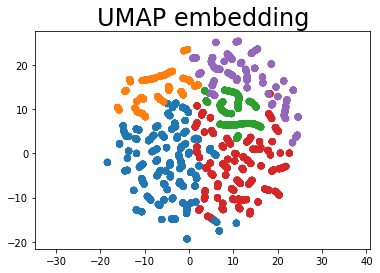

In [33]:
# plot embedding
umap_plot(X.iloc[:,:-1].values, clusters)

## Fuzzy c means clustering

In [34]:
# get a subsample of the data
df_sample = df.groupby('type').apply(lambda x: x.sample(50, random_state=0)).reset_index(drop=True)
X = df_sample.iloc[:,:-1]

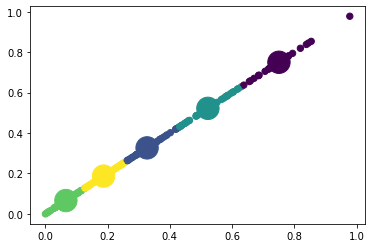

In [35]:
# use fuzzy c-means to cluster the data
centroids, membership_matrix = fuzzy_clustering(X, 5, 2)
plot_fuzzy_cmeans(X.values, 5, centroids, membership_matrix)

## Mountain clustering

In [36]:
# get the dimensions of the data
n = X.shape[1]
# define parameters for the mountain algorithm
gr = 2
kn = 5
sigma = [0.1,0.2,0.2,0.2,0.2]
# use mountain algorithm to cluster the data
clusters,centers = mountain_clustering(n,gr,X.values,sigma,kn)

Cluster  1  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Cluster  2  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5]
Cluster  3  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0]
Cluster  4  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 1.0]
Cluster  5  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0]


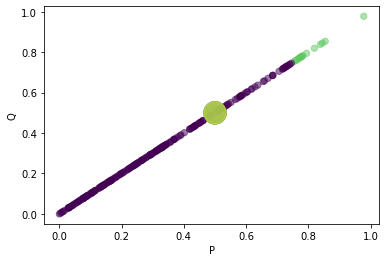

In [37]:
# plot the results
plot_mountain(X,5,centers,clusters)

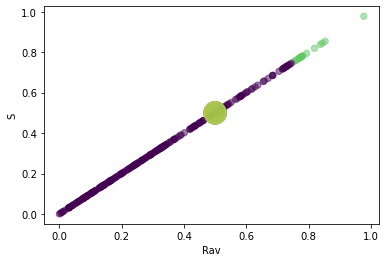

In [38]:
plot_mountain1(X,5,centers,clusters)

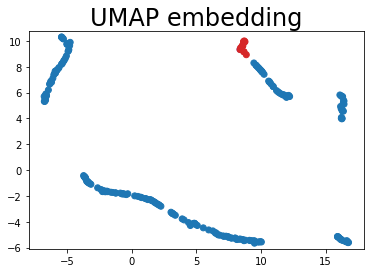

In [39]:
# plot the embedding
umap_plot(X.values, clusters)

## Subtractive clustering

In [40]:
# define parameters for the subtractive algorithm
r_a = 0.1
r_b = 2*r_a
# use subtractive algorithm to cluster the data
clusters, centers = subtractive_clustering(r_a, r_b, X, 5)

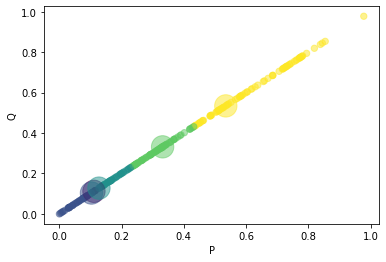

In [41]:
plot_subtractive(X,5,centers,clusters)

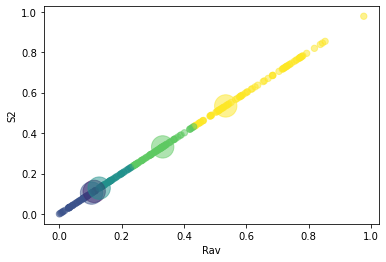

In [42]:
plot_subtractive1(X,5,centers,clusters)

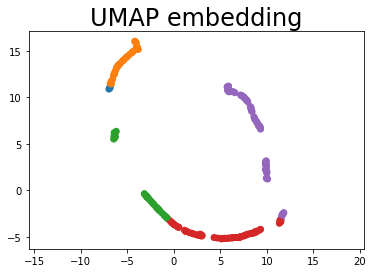

In [43]:
# plot the embedding
umap_plot(X.values, clusters)

### Scikit-learn approach for arrhythmias

In [ ]:
# kmeans clustering using scikit learn
from sklearn.cluster import KMeans

# select all features except the last one (type)
X = df.iloc[:,:-1]
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

X['cluster'] = kmeans.labels_

# plot the clusters
plot3D(X,'P','Q','T','cluster')

In [ ]:
# plot embedding
umap_plot(X.values, kmeans.labels_)

In [ ]:
# get 1000 samples per type 
df_sample = df.groupby('type').apply(lambda x: x.sample(1000, random_state=0)).reset_index(drop=True)

In [ ]:
# dbscan clustering

from sklearn.cluster import DBSCAN

# select all features except the last one (type)
X = df_sample.iloc[:,:-1]
dbscan = DBSCAN(eps=0., min_samples=5).fit(X)

X['cluster'] = dbscan.labels_
#plot clusters
plot3D(X,'P','Q','T','cluster')

In [ ]:
# plot embedding
umap_plot(X.values, dbscan.labels_)

# Healthy personality traits dataset

In [44]:
# read healthy csv from data folder
df_healthy = pd.read_csv('../data/healthy_5_labels.csv')
df_healthy.head()

Unnamed: 0        P1         P        P2         Q         R         S  \
0           0 -0.000822  0.131579  0.239309  0.265625  0.312500  0.351974   
1           1 -0.000824  0.131904  0.239901  0.266282  0.313273  0.352844   
2           2 -0.000827  0.132341  0.240695  0.267163  0.314309  0.354012   
3           3 -0.000832  0.133111  0.242097  0.267887  0.315308  0.355241   
4           4 -0.000836  0.133779  0.243311  0.269231  0.316890  0.357023   

         T1         T  Cluster  
0  0.703125  0.868421        0  
1  0.703215  0.868920        0  
2  0.703060  0.869313        0  
3  0.707155  0.870216        0  
4  0.709030  0.872074        0

In [45]:
# eliminate samples from cluster 2 and cluster 4
df_healthy = df_healthy[df_healthy['Cluster'] != 2]
df_healthy = df_healthy[df_healthy['Cluster']!=4]
df_sample = df_healthy.groupby('Cluster').apply(lambda x: x.sample(1000, random_state=0)).reset_index(drop=True)
# drop unnamed and cluster columns
x_healthy = df_sample.drop(columns =['Unnamed: 0','Cluster'])
x_healthy.sample(3)

P1         P        P2         Q         R         S        T1  \
2895 -0.001091  0.109051  0.197383  0.307525  0.377317  0.428571  0.608506   
222  -0.000960  0.110365  0.236084  0.268714  0.330134  0.378119  0.659309   
454  -0.001079  0.140237  0.222222  0.239482  0.348436  0.398058  0.650485   

             T  
2895  0.827699  
222   0.852207  
454   0.867314

## K-means clustering

In [46]:
# use kmeans to cluster the data
centroids,clusters = kmeans_clustering(x_healthy,3)
x_healthy['cluster'] = clusters
# plot the results
plot3D(x_healthy,'P','Q','T','cluster')

In [47]:
plot3D(x_healthy,'S','R','T','cluster')

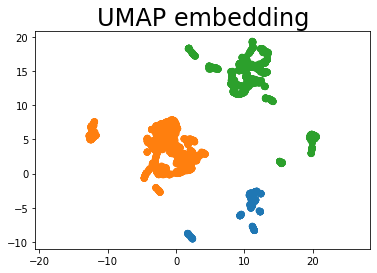

In [48]:
# plot the embedding
umap_plot(x_healthy.values, clusters)

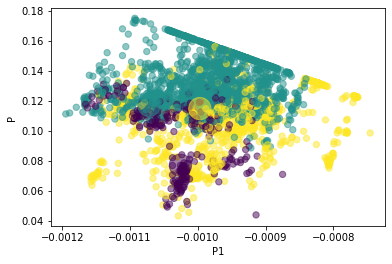

In [49]:
plot_kmeans(x_healthy, 3, centroids.values, clusters)

## Fuzzy c means clustering

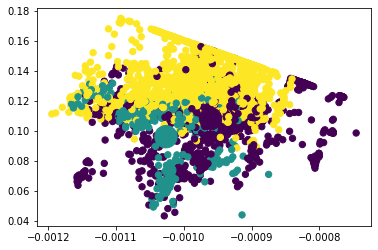

In [50]:
# use fuzzy c-means to cluster the data
centroids, membership_matrix = fuzzy_clustering(x_healthy, 3, 2)
plot_fuzzy_cmeans(x_healthy.values, 3, centroids, membership_matrix)

## Mountain clustering

In [51]:
# get the dimension of the data
n = x_healthy.shape[1]
# define parameters for the mountain algorithm
gr = 2
kn = 5
sigma = [0.1,0.2,0.2,0.2,0.2]
# use mountain algorithm to cluster the data
clusters,centers = mountain_clustering(n,gr,x_healthy.values,sigma,kn)

Cluster  1  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0]
Cluster  2  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0]
Cluster  3  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0]
Cluster  4  center:  [0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0]
Cluster  5  center:  [0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


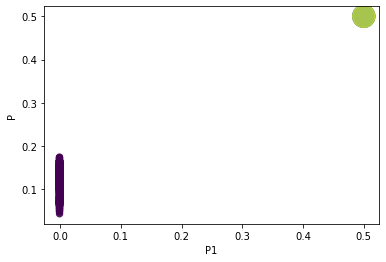

In [52]:
plot_mountain(x_healthy,5,centers,clusters)

In [53]:
x_healthy['cluster'] = clusters

In [54]:
# plot 3 variables of the clustered data
plot3D(x_healthy,'S','R','T','cluster')

## Subtractive clustering

In [ ]:
# define parameters for the subtractive algorithm
r_a = 0.1
r_b = 2*r_a
# use subtractive algorithm to cluster the data
clusters, centers = subtractive_clustering(r_a, r_b, x_healthy, 5)

In [ ]:
plot_subtractive(x_healthy,3,centers,clusters)

In [ ]:
x_healthy['cluster2'] = clusters
# plot the variables of the clustered data
plot3D(x_healthy,'S','R','T','cluster2')

# Healthy and ill patients (with arrhythmias)

In [ ]:
# read healthy csv from data folder
df_ill = pd.read_csv('../data/all_patients_fiducial_points.csv')
df_ill.head()

In [11]:
df_sample = df_ill.groupby('Class').apply(lambda x: x.sample(1000, random_state=0)).reset_index(drop=True)
# drop unnamed and cluster columns
x_ill = df_sample.drop(columns =['Unnamed: 0','Class'])
x_ill.sample(3)

P1         P        P2         Q         R         S        T1  \
837  -0.001002  0.160321  0.289579  0.370741  0.433868  0.484970  0.656313   
1571 -0.011765  0.211765  0.411765  0.494118  0.576471  0.682353  0.658824   
283  -0.001020  0.118367  0.252041  0.300000  0.369388  0.426531  0.605102   

             T  
837   0.857715  
1571  0.823529  
283   0.810204

## K-means clustering

In [26]:
# use kmeans to cluster the data 
centroids,clusters = kmeans_clustering(x_ill,2)
x_ill['cluster'] = clusters
# plot the results
plot3D(x_ill,'P','Q','T','cluster')

In [27]:
# plot 3 variables of the clustered data
plot3D(x_ill,'S','R','T','cluster')

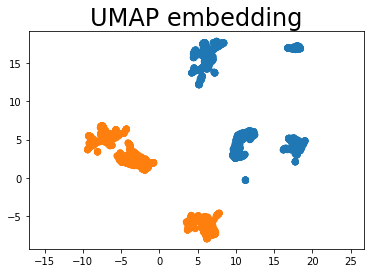

In [28]:
# plot the embedding
umap_plot(x_ill.values, clusters)

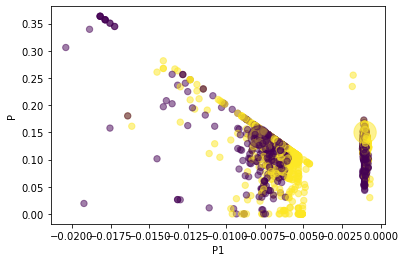

In [29]:
plot_kmeans(x_ill, 2, centroids.values, clusters)

## Fuzzy c-means clustering

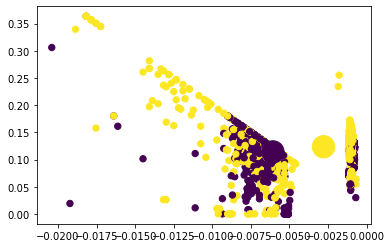

In [13]:
# use fuzzy c-means to cluster the data
centroids, membership_matrix = fuzzy_clustering(x_ill, 2, 2)
plot_fuzzy_cmeans(x_ill.values, 2, centroids, membership_matrix)

## Mountain clustering

In [14]:
# get the dimension of the data
n = x_ill.shape[1]
# define parameters for the mountain algorithm
gr = 2
kn = 2
sigma = [0.1,0.2]
# use mountain algorithm to cluster the data
clusters,centers = mountain_clustering(n,gr,x_ill.values,sigma,kn)

Cluster  1  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0]
Cluster  2  center:  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0]


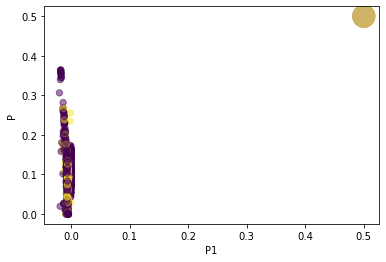

In [15]:
plot_mountain(x_ill,2,centers,clusters)

In [16]:
x_ill['cluster'] = clusters
# plot 3 variables of the clustered data
plot3D(x_ill,'S','R','T','cluster')

## Subtractive clustering

In [17]:
# define parameters for the subtractive algorithm
r_a = 0.1
r_b = 2*r_a
# use subtractive algorithm to cluster the data
clusters, centers = subtractive_clustering(r_a, r_b, x_ill, 2)

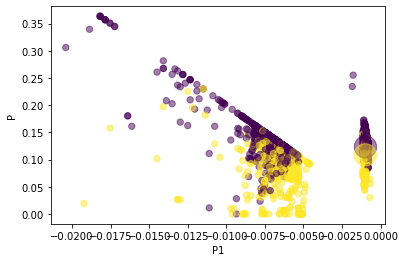

In [18]:
plot_subtractive(x_ill,2,centers,clusters)

In [21]:
x_ill['cluster2'] = clusters
# plot 3 variales of the clustered data
plot3D(x_ill,'S','R','T','cluster2')